#### Weight Initialization Techniques
When training neural networks, the choice of weight initialization can significantly impact the convergence and performance of the model

In [163]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [168]:
# Insurance Data Load and Preprocessing
df = pd.read_csv('insurance_data.csv')
x_train, x_test, y_train, y_test = train_test_split(df[['age','affordibility']], df['bought_insurance'], test_size=0.2, random_state=25)

# scalling the age
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled['age'] = x_train_scaled['age']/100;
x_test_scaled['age'] = x_test_scaled['age']/100;
x_train_scaled.head()

,age,affordibility
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1


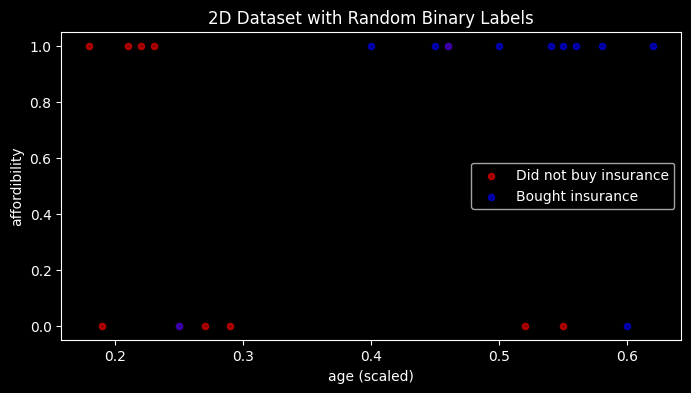

In [171]:
# Visualize the dataset
plt.figure(figsize=(8, 4))
plt.scatter(x_train_scaled[y_train==0]['age'], x_train_scaled[y_train==0]['affordibility'], c='red', alpha=0.6, label='Did not buy insurance', s=20)
plt.scatter(x_train_scaled[y_train==1]['age'], x_train_scaled[y_train==1]['affordibility'], c='blue', alpha=0.6, label='Bought insurance', s=20)
plt.xlabel('age (scaled)')
plt.ylabel('affordibility')
plt.title('2D Dataset with Random Binary Labels')
plt.legend()

1. Weight Initialization to zero

In [172]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

d:\Softwares\DL\conda\envs\dl_venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_131 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [173]:
weights_keras = model.get_weights()
weights_keras

[array([[-0.6456678 , -0.19378668, -0.6037226 , -0.44574288,  0.47530454,
          0.40705413,  0.40337485,  0.54336756,  0.1452679 ,  0.18284702],
        [ 0.20920652,  0.3991639 , -0.48201227, -0.31381178, -0.6050313 ,
          0.62610394,  0.07246524, -0.52311   ,  0.4881236 , -0.03465515]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.54421884, -0.4597386 ,  0.6145502 ,  0.11625952, -0.22711077],
        [ 0.45790428, -0.3765909 ,  0.23373872,  0.550026  ,  0.24651283],
        [ 0.3539825 ,  0.32752204, -0.4120879 , -0.04275036,  0.18587023],
        [-0.5586183 ,  0.5589089 , -0.30381268, -0.5444123 ,  0.5703357 ],
        [-0.42372248,  0.3645923 ,  0.05271512, -0.1630922 , -0.33351874],
        [ 0.5244171 ,  0.42487198,  0.00382358,  0.2827785 ,  0.01627123],
        [ 0.01971054,  0.5363808 , -0.39985076, -0.48949355, -0.5730321 ],
        [ 0.03755105,  0.5213594 ,  0.46825522, -0.06613988,  0.2476983 ],
        [-0.4

In [240]:
zero_weights = tf.zeros_initializer()
model_zeros = keras.Sequential([
    keras.layers.Dense(10, activation='tanh', input_shape=(2,), kernel_initializer=zero_weights),
    keras.layers.Dense(5, activation='tanh', kernel_initializer=zero_weights),
    keras.layers.Dense(1, activation='sigmoid', kernel_initializer=zero_weights)
])
model_zeros.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_zeros.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [241]:
model.fit(x_train_scaled, y_train, epochs=10, batch_size=10)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4545 - loss: 0.7043
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4091 - loss: 0.7005
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4091 - loss: 0.6969
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3636 - loss: 0.6951
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4091 - loss: 0.6912
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6364 - loss: 0.6897
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7273 - loss: 0.6886
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5909 - loss: 0.6874
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5909 - loss: 0.6866
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5909 - loss: 0.6853


In [242]:
# Model weights after training
model_zeros.get_weights() # Still all zeros

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

2. Weight Initialization to small random values

In [243]:
small_random_initializer = tf.random_uniform_initializer(minval=-0.01, maxval=0.01)
model_small_random = keras.Sequential([
    keras.layers.Dense(10, activation='tanh', input_shape=(2,), kernel_initializer=small_random_initializer),
    keras.layers.Dense(5, activation='tanh', kernel_initializer=small_random_initializer),
    keras.layers.Dense(1, activation='sigmoid', kernel_initializer=small_random_initializer)
])
model_small_random.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_small_random.get_weights()

d:\Softwares\DL\conda\envs\dl_venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[array([[-7.4734092e-03, -8.6054942e-03,  8.9211334e-03,  6.3784495e-03,
         -9.3637388e-03, -7.6362081e-03, -2.0350423e-04, -6.3540740e-03,
         -9.4635691e-04,  1.7256690e-03],
        [ 3.2020090e-03,  9.4606224e-03, -1.5612245e-03, -4.3697655e-05,
         -6.8588397e-03,  3.7763165e-03, -9.0689082e-03, -6.3590575e-03,
          7.0261806e-03, -7.3051024e-03]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.00095697, -0.00345613, -0.00084158, -0.00294013,  0.00384271],
        [-0.00138524,  0.00941043,  0.00268256,  0.00363355, -0.00351399],
        [ 0.00619259, -0.00418879, -0.00363724, -0.00490804, -0.00501256],
        [-0.00918818, -0.00763049, -0.00281255, -0.00056376, -0.00058601],
        [-0.00990568,  0.00615584, -0.00902747,  0.00218845,  0.00752304],
        [ 0.00785488, -0.00361755,  0.00559014,  0.00370026, -0.00330187],
        [-0.00861643, -0.00344903,  0.00184181,  0.00065682,  0.00979917],
        [-0.00720

In [244]:
model_small_random.fit(x_train_scaled, y_train, epochs=50, batch_size=10)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4545 - loss: 0.6933  
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.6932

In [245]:
# Model weights after training
model_small_random.get_weights() # Weights have only small change

[array([[-0.12949365,  0.11349088,  0.12687652,  0.12849972, -0.12846102,
          0.09966446, -0.12251903, -0.12066788,  0.12121536,  0.10954471],
        [-0.1087374 ,  0.12090901,  0.10703111,  0.11211713, -0.11480838,
          0.10358734, -0.12113412, -0.10915898,  0.1188987 ,  0.09840183]],
       dtype=float32),
 array([ 0.01314383, -0.01306985, -0.01537806, -0.01306848,  0.01407023,
        -0.01240451,  0.01309504,  0.015733  , -0.01289487, -0.00959279],
       dtype=float32),
 array([[ 0.1107247 ,  0.12815921, -0.13077761, -0.13268779,  0.13499309],
        [-0.1102258 , -0.11508064,  0.12440871,  0.12548298, -0.12905748],
        [-0.11194179, -0.14283131,  0.13490018,  0.1356442 , -0.14747457],
        [-0.12008283, -0.13666393,  0.12511708,  0.1283084 , -0.13161393],
        [ 0.10254998,  0.13344799, -0.1366177 , -0.12913737,  0.13933536],
        [-0.09621084, -0.13057852,  0.1283249 ,  0.12153422, -0.12210134],
        [ 0.10131668,  0.12061117, -0.12095147, -0.1241473

3. Weight Initialization with a non-zero constant value

In [246]:
const_weights = tf.constant_initializer(0.5)
model_const = keras.Sequential([
    keras.layers.Dense(10, activation='tanh', input_shape=(2,), kernel_initializer=const_weights),
    keras.layers.Dense(5, activation='tanh', kernel_initializer=const_weights),
    keras.layers.Dense(1, activation='sigmoid', kernel_initializer=const_weights)
])
model_const.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_const.get_weights()

d:\Softwares\DL\conda\envs\dl_venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.], dtype=float32)]

In [247]:
model_const.fit(x_train_scaled, y_train, epochs=100, batch_size=10)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5000 - loss: 1.1226 
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 1.1117
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 1.0992
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5000 - loss: 1.0874
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 1.0768
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 1.0643
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5000 - loss: 1.0529
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5000 - loss: 1.0409
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 1.0309
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5000 - loss: 1.0182
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 1.0089
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - l

In [248]:
# Weights after training
model_const.get_weights() # weights are same for a given input

[array([[0.35308155, 0.35308155, 0.35308155, 0.35308155, 0.35308155,
         0.35308155, 0.35308155, 0.35308155, 0.35308155, 0.35308155],
        [0.22015414, 0.22015414, 0.22015414, 0.22015414, 0.22015414,
         0.22015414, 0.22015414, 0.22015414, 0.22015414, 0.22015414]],
       dtype=float32),
 array([-0.17103082, -0.17103082, -0.17103082, -0.17103082, -0.17103082,
        -0.17103082, -0.17103082, -0.17103082, -0.17103082, -0.17103082],
       dtype=float32),
 array([[0.3338978, 0.3338978, 0.3338978, 0.3338978, 0.3338978],
        [0.3338978, 0.3338978, 0.3338978, 0.3338978, 0.3338978],
        [0.3338978, 0.3338978, 0.3338978, 0.3338978, 0.3338978],
        [0.3338978, 0.3338978, 0.3338978, 0.3338978, 0.3338978],
        [0.3338978, 0.3338978, 0.3338978, 0.3338978, 0.3338978],
        [0.3338978, 0.3338978, 0.3338978, 0.3338978, 0.3338978],
        [0.3338978, 0.3338978, 0.3338978, 0.3338978, 0.3338978],
        [0.3338978, 0.3338978, 0.3338978, 0.3338978, 0.3338978],
        

In [253]:
# Decision boundary visualization
def plot_decision_boundary(model, title="Decision Boundary"):
    plt.figure(figsize=(8, 6))
    
    x_min, x_max = x_train_scaled.iloc[:, 0].min() - 0.1, x_train_scaled.iloc[:, 0].max() + 0.1
    y_min, y_max = x_train_scaled.iloc[:, 1].min() - 5, x_train_scaled.iloc[:, 1].max() + 5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),  # Fine step for scaled age
                         np.arange(y_min, y_max, 0.5))   # Reasonable step for affordability
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points, verbose=0)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, levels=50, alpha=0.4, cmap='RdYlBu')
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    plt.scatter(x_train_scaled[y_train==0].iloc[:, 0], x_train_scaled[y_train==0].iloc[:, 1], 
                c='red', alpha=0.9, label='Did not buy insurance', s=40, edgecolors='black', linewidth=0.5)
    plt.scatter(x_train_scaled[y_train==1].iloc[:, 0], x_train_scaled[y_train==1].iloc[:, 1], 
                c='blue', alpha=0.9, label='Bought insurance', s=40, edgecolors='black', linewidth=0.5)
    
    plt.xlabel('Age (scaled)')
    plt.ylabel('Affordability')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.colorbar(label='Prediction Probability')
    plt.show()

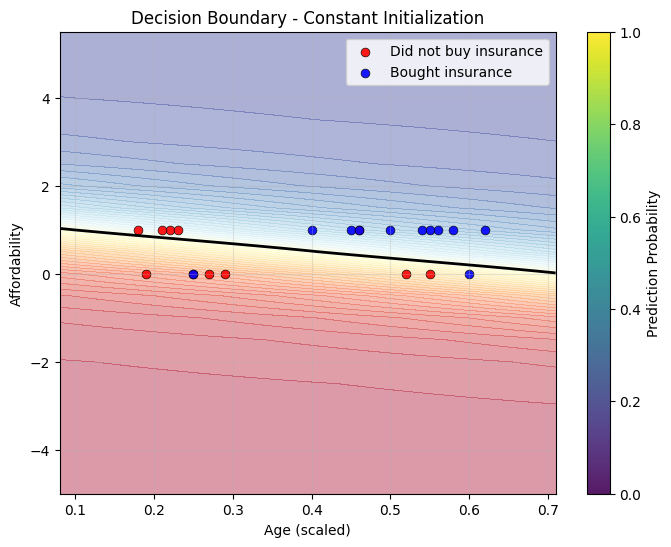

In [254]:
plot_decision_boundary(model_const, "Decision Boundary - Constant Initialization")
# Straight line shows that model is behaving like a linear model due to identical weights

Manual Implementation of Xavier / Glorot Weight Initialization Technique

In [271]:
xavier_model = keras.Sequential([
    keras.layers.Dense(10, activation='tanh', input_shape=(2,)),
    keras.layers.Dense(5, activation='tanh'),
    keras.layers.Dense(5, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])
xavier_model.summary()        

d:\Softwares\DL\conda\envs\dl_venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_187 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_188 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_189 (Dense)               │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_190 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [272]:
initial_weights = xavier_model.get_weights()
initial_weights

[array([[-0.68755364, -0.13438284, -0.4576497 ,  0.43847662,  0.54861647,
          0.45488197,  0.10410088,  0.31501597, -0.39683178, -0.45142344],
        [-0.69882137, -0.08819377,  0.58367294,  0.23992395,  0.3139605 ,
          0.4841388 , -0.03412056, -0.55302477,  0.4181928 ,  0.67773265]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.51509374,  0.20321554,  0.35403043, -0.3431127 ,  0.13265884],
        [ 0.41775018, -0.11712414, -0.60136145, -0.11722034,  0.0631116 ],
        [ 0.2605778 , -0.36758006,  0.15714204, -0.5912085 ,  0.14916772],
        [-0.21057433,  0.5579639 , -0.28471026, -0.45014602,  0.52575487],
        [ 0.00091195, -0.32597914,  0.40954167,  0.20081735, -0.49197388],
        [-0.47676092, -0.07965982,  0.28058845,  0.09284794,  0.5421458 ],
        [-0.15942785, -0.4576072 , -0.4265231 , -0.24204072,  0.23773807],
        [ 0.08200985,  0.2270922 , -0.37478748,  0.22667742, -0.40705952],
        [ 0.1

In [273]:
initial_weights[0] = np.random.randn(2, 10)*np.sqrt(1 / (2))
initial_weights[1] = np.zeros((10,))
initial_weights[2] = np.random.randn(10, 5)*np.sqrt(1 / (10))
initial_weights[3] = np.zeros((5,))
initial_weights[4] = np.random.randn(5, 5)*np.sqrt(1 / (5))
initial_weights[5] = np.zeros((5,))
initial_weights[6] = np.random.randn(5, 1)*np.sqrt(1 / (5))
initial_weights[7] = np.zeros((1,))
xavier_model.set_weights(initial_weights)

In [274]:
xavier_model.get_weights()

[array([[-0.8015712 ,  0.7048155 , -0.10519356,  0.06788523, -0.03189992,
          0.05594751,  0.601416  , -0.5933504 , -0.7154323 ,  0.06008155],
        [-1.1359243 , -0.97089547,  1.3199443 ,  0.535611  , -0.007111  ,
          0.8754031 , -0.73581475, -0.22316511,  0.44084826,  0.62979996]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.16219854, -0.80361027, -0.30613443,  0.15086217, -0.11256175],
        [ 0.8032918 ,  0.29300347,  0.176481  , -0.35321045, -0.01116181],
        [ 0.07627539,  0.3566365 ,  0.27863812,  0.32665986, -0.29216662],
        [ 0.44656157, -0.43653053, -0.16947107,  0.1362218 , -0.04739988],
        [-0.31813678, -0.25979686, -0.48960102,  0.16822515,  0.39862686],
        [-0.03174721, -0.12660141, -0.4655894 ,  0.2887798 ,  0.69927585],
        [-0.56840545, -0.33628702, -0.21490619, -0.178453  ,  0.0718931 ],
        [ 0.5104705 ,  0.31894648,  0.16684094, -0.22892636, -0.35405752],
        [-0.2

In [306]:
xavier_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
xavier_model.fit(x_train_scaled, y_train, epochs=150, batch_size=10)

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8636 - loss: 0.4503
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8636 - loss: 0.4475
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8636 - loss: 0.4456
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8636 - loss: 0.4437
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8636 - loss: 0.4425
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8636 - loss: 0.4417
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8636 - loss: 0.4406
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8636 - loss: 0.4397
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8636 - loss: 0.4384
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8636 - loss: 0.4371
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8636 - loss: 0.4362
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8636 - lo

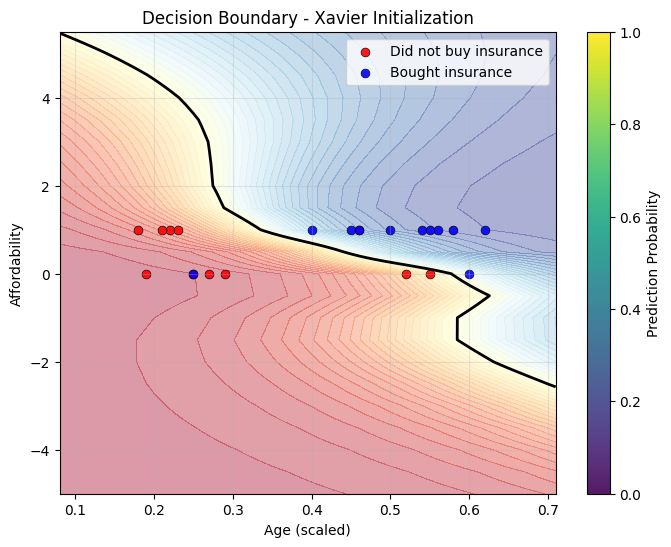

In [307]:
# Plotting decision boundary after training with Xavier initialization
plot_decision_boundary(xavier_model, "Decision Boundary - Xavier Initialization")
# we can see that with Xavier initialization, the model is able to learn a non-linear decision boundary effectively.

Manual Implementation of He Weight Initialization Technique

In [290]:
he_model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
he_model.summary()

Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_203 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_204 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_205 (Dense)               │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_206 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [294]:
he_initial_weights = he_model.get_weights()
he_initial_weights

[array([[-0.49017105, -0.27017984,  0.03112596, -0.46142334, -0.6940242 ,
          0.12663507, -0.15277791,  0.0230577 , -0.15065002, -0.1371929 ],
        [ 0.29493028,  0.38952726,  0.69746596,  0.5076763 , -0.6353115 ,
          0.460427  , -0.52732015,  0.40825456,  0.26722938, -0.46801445]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.14066803, -0.09622401, -0.06620985,  0.21698153, -0.36780852],
        [ 0.21472979, -0.12329185,  0.1742521 ,  0.37128013, -0.4886553 ],
        [ 0.02505767, -0.54082626,  0.37587255, -0.06175798, -0.5694195 ],
        [-0.5913687 , -0.23625478, -0.12564552,  0.15252429,  0.608903  ],
        [ 0.24387264, -0.50655264,  0.2698239 ,  0.01973194, -0.19647568],
        [ 0.01077658,  0.51267356, -0.45895016,  0.3520717 , -0.525456  ],
        [ 0.27572578,  0.16015846,  0.62710005, -0.5517898 , -0.4595061 ],
        [-0.03422594,  0.45782   , -0.38562515,  0.00590688, -0.4031037 ],
        [ 0.2

In [299]:
he_initial_weights[0] = np.random.randn(2, 10)*np.sqrt(2 / (2))
he_initial_weights[1] = np.zeros((10,))
he_initial_weights[2] = np.random.randn(10, 5)*np.sqrt(2 / (10))
he_initial_weights[3] = np.zeros((5,))
he_initial_weights[4] = np.random.randn(5, 5)*np.sqrt(2 / (5))
he_initial_weights[5] = np.zeros((5,))
he_initial_weights[6] = np.random.randn(5, 1)*np.sqrt(2 / (5))
he_initial_weights[7] = np.zeros((1,))
he_model.set_weights(he_initial_weights)

In [300]:
he_model.get_weights()

[array([[ 0.9760375 , -1.5569339 , -1.3298919 , -0.35549477, -1.1974277 ,
          1.4863993 , -0.4102187 ,  1.3821819 ,  1.4867824 ,  0.04277972],
        [ 0.50179976, -0.05609947,  0.538437  ,  0.48334184, -0.12364963,
          0.50496995,  1.7236962 ,  0.7130162 ,  0.3257996 ,  0.12476952]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-4.5288119e-01, -4.5942113e-01,  1.4460944e-01, -6.1241031e-01,
         -3.4271213e-01],
        [ 5.7310927e-01,  8.5606956e-01, -7.4503821e-01,  7.2745979e-01,
         -9.4558075e-02],
        [-6.7104790e-03, -5.0719224e-02,  4.8323402e-01, -7.1897483e-01,
          2.0400257e-01],
        [-4.2255878e-01,  2.5526440e-01,  6.8995953e-01, -1.8663405e-04,
          1.6732724e-01],
        [ 1.8315712e-01, -3.5758910e-01,  6.7602569e-01,  7.6315582e-01,
          3.1384706e-01],
        [ 3.2774240e-02, -2.0656520e-01, -2.8017494e-01,  7.6510936e-01,
          6.3254565e-01],
        [-2.8470283

In [305]:
he_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
he_model.fit(x_train_scaled, y_train, epochs=150, batch_size=10)

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8182 - loss: 0.5848
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8182 - loss: 0.5840
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8182 - loss: 0.5827
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8182 - loss: 0.5826
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8182 - loss: 0.5818
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8182 - loss: 0.5811
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8182 - loss: 0.5810 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8182 - loss: 0.5803
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8182 - loss: 0.5797
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8182 - loss: 0.5796
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8182 - loss: 0.5792
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8182 - lo

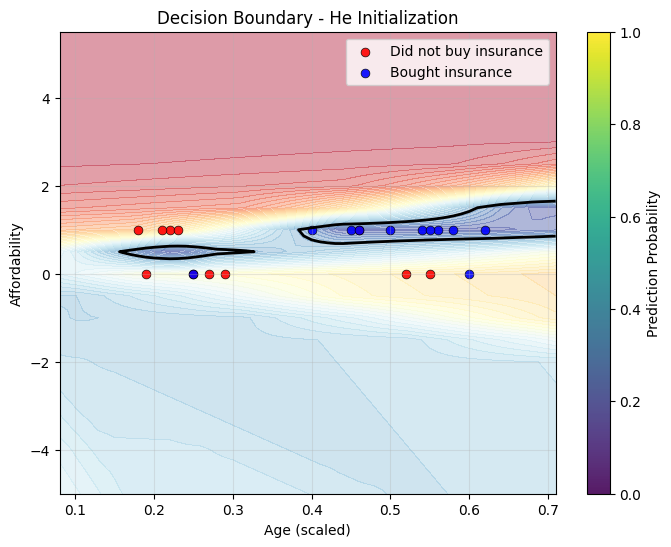

In [308]:
# Plotting decision boundary after training with He initialization
plot_decision_boundary(he_model, "Decision Boundary - He Initialization")
# we can see the similar visualization with He initialization